In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten,Conv2D,MaxPool2D,ZeroPadding2D,Dense,Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam


In [2]:
data_generator=ImageDataGenerator(rescale=1./255)
train=data_generator.flow_from_directory('pet_train/',target_size=(200,200),batch_size=50,class_mode='binary')

Found 1364 images belonging to 2 classes.


In [3]:
test=data_generator.flow_from_directory('pet_test/',target_size=(200,200),batch_size=50,class_mode='binary')


Found 400 images belonging to 2 classes.


In [62]:
model=Sequential()
model.add(Conv2D(64,(3,3),
                 activation='relu',
                 input_shape=(200,200,3)
                 ,padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(100,activation='relu'))
model.add(Dense(1,activation='sigmoid'))


In [63]:
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 200, 200, 100)  │         2,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 100, 100, 100)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 1000000)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 700)            │   700,000,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 1)              │           701 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 700,004,201 (2.61 GB)

 Trainable params: 700,004,201 (2.61 GB)

 Non-trainable params: 0 (0.00 B)

In [64]:
model.compile(optimizer=Adam(),  loss='binary_crossentropy',metrics=['accuracy'])

In [65]:
history=model.fit(train,steps_per_epoch=len(train),epochs=10,validation_data=test,validation_steps=len(test))

Epoch 1/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 178s 9s/step - accuracy: 0.4578 - loss: 23.9787 - val_accuracy: 0.5025 - val_loss: 2.3375
Epoch 2/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 189s 10s/step - accuracy: 0.5896 - loss: 0.8715 - val_accuracy: 0.5200 - val_loss: 0.7101
Epoch 3/10
 2/18 ━━━━━━━━━━━━━━━━━━━━ 2:29 9s/step - accuracy: 0.6600 - loss: 0.6083 

ResourceExhaustedError: Graph execution error:

Detected at node PyFunc defined at (most recent call last):
<stack traces unavailable>
MemoryError: Unable to allocate 22.9 MiB for an array with shape (50, 200, 200, 3) and data type float32
Traceback (most recent call last):

  File "C:\Users\LOQ\AppData\Local\Programs\Python\Python313\Lib\site-packages\tensorflow\python\ops\script_ops.py", line 269, in __call__
    ret = func(*args)

  File "C:\Users\LOQ\AppData\Local\Programs\Python\Python313\Lib\site-packages\tensorflow\python\autograph\impl\api.py", line 643, in wrapper
    return func(*args, **kwargs)

  File "C:\Users\LOQ\AppData\Local\Programs\Python\Python313\Lib\site-packages\tensorflow\python\data\ops\from_generator_op.py", line 198, in generator_py_func
    values = next(generator_state.get_iterator(iterator_id))

  File "C:\Users\LOQ\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py", line 264, in _finite_generator
    yield self._standardize_batch(self.py_dataset[i])
                                  ~~~~~~~~~~~~~~~^^^

  File "C:\Users\LOQ\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\legacy\preprocessing\image.py", line 71, in __getitem__
    return self._get_batches_of_transformed_samples(index_array)
           ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^

  File "C:\Users\LOQ\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\legacy\preprocessing\image.py", line 309, in _get_batches_of_transformed_samples
    batch_x = np.zeros(
        (len(index_array),) + self.image_shape, dtype=self.dtype
    )

numpy._core._exceptions._ArrayMemoryError: Unable to allocate 22.9 MiB for an array with shape (50, 200, 200, 3) and data type float32


	 [[{{node PyFunc}}]]
	 [[IteratorGetNext]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.
 [Op:__inference_multi_step_on_iterator_15795]

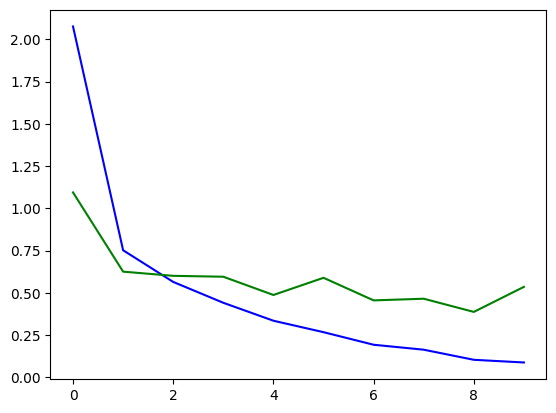

In [57]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],color='blue',label="train data")
plt.plot(history.history['val_loss'],color='green',label="validation data")

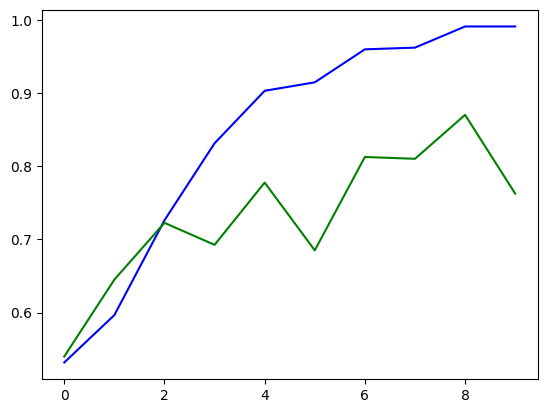

In [58]:
plt.plot(history.history['accuracy'], color='blue', label="train data")
plt.plot(history.history['val_accuracy'], color='green', label="validation data")

In [58]:
model.save("cat_dog.keras")